# PCA and PLS Regression with POUR data
Use data from POUR run on Sept. 14th, 2021  
- Samples collected every hour
- 40 mM urea in 0.15M NaCl saline starting concentration

Use the code at the bottom to find the best wavelength range for the highest r-squared values per PCA or PLS regression model

In [1]:
# Import packages

# Pandas library for the pandas dataframes

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd   

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

In [2]:
# Import data

abs_data = pd.read_csv('pour_init.csv')

In [4]:
abs_data

,Concentration (mM),Date,Time (hr),Run through (y/n),190,191,192,193,194,195,...,791,792,793,794,795,796,797,798,799,800
0,40.00,"Sept. 14, 2021",0,0,0.000,-0.018,-0.008,-0.040,-0.029,-0.003,...,0.000,-0.004,-0.001,-0.001,-0.002,0.000,-0.001,-0.003,-0.001,-0.002
1,39.76,"Sept. 14, 2022",0,1,0.024,0.014,0.026,0.003,0.010,0.034,...,0.001,-0.003,0.001,0.001,-0.002,0.002,0.001,-0.001,0.001,0.000
2,39.32,"Sept. 14, 2023",1,1,0.110,0.099,0.111,0.090,0.094,0.130,...,-0.001,-0.004,-0.001,-0.003,-0.004,-0.002,-0.001,-0.004,-0.002,-0.002
3,38.87,"Sept. 14, 2024",2,1,0.174,0.203,0.195,0.176,0.192,0.219,...,0.000,-0.002,0.000,0.000,-0.002,0.001,0.000,-0.003,0.000,0.000
4,38.41,"Sept. 14, 2025",3,1,0.223,0.231,0.225,0.188,0.233,0.256,...,0.000,-0.004,0.000,-0.002,-0.003,0.000,-0.001,-0.004,-0.002,-0.003
5,37.98,"Sept. 14, 2026",4,1,0.255,0.257,0.249,0.229,0.248,0.278,...,-0.001,-0.004,-0.001,0.000,-0.004,-0.001,-0.002,-0.005,-0.002,-0.002
6,37.55,"Sept. 14, 2027",5,1,0.302,0.280,0.272,0.255,0.272,0.308,...,0.000,-0.005,-0.002,-0.001,-0.003,-0.001,-0.002,-0.004,-0.001,-0.003
7,37.13,"Sept. 14, 2028",6,1,0.294,0.281,0.289,0.282,0.304,0.329,...,0.000,-0.005,-0.001,-0.002,-0.003,0.000,-0.002,-0.004,-0.001,-0.002


#### Specify features (X) and target (y)

In [14]:
X = abs_data.iloc[:, 4:615].values
y = abs_data[['Concentration (mM)']].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True)

#### Fit principal component analysis (PCA) and partial least squares (PLS) regression models to the POUR data

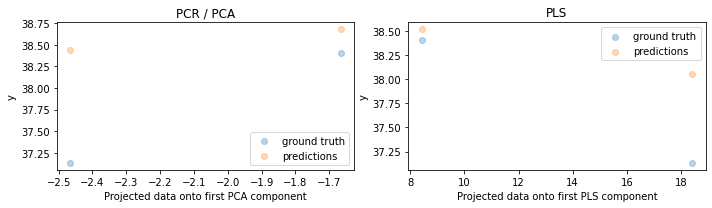

In [15]:
pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(pca.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[0].scatter(
    pca.transform(X_test), pcr.predict(X_test), alpha=0.3, label="predictions"
)
axes[0].set(
    xlabel="Projected data onto first PCA component", ylabel="y", title="PCR / PCA"
)
axes[0].legend()
axes[1].scatter(pls.transform(X_test), y_test, alpha=0.3, label="ground truth")
axes[1].scatter(
    pls.transform(X_test), pls.predict(X_test), alpha=0.3, label="predictions"
)
axes[1].set(xlabel="Projected data onto first PLS component", ylabel="y", title="PLS")
axes[1].legend()
plt.tight_layout()
plt.show()

#### Print the R-squared values for each regression

In [16]:
print(f"PCR r-squared {pcr.score(X_test, y_test):.3f}")
print(f"PLS r-squared {pls.score(X_test, y_test):.3f}")

PCR r-squared -1.191
PLS r-squared -0.059


#### Find best wavelength range

In [20]:
# Create integer lists of starting wavelengths and stopping wavelengths to probe
start_wl = np.linspace(5, 10, num=6)
start_wl = [round(x) for x in start_wl]
stop_wl = np.linspace(11, 100, num=90)
stop_wl = [round(x) for x in stop_wl]

# Initiate lists for results
starting_wavelength = []
stopping_wavelength = []
pcr_r_squared = []
pls_r_squared = []

for start in start_wl:
    for stop in stop_wl:
        X = abs_data.iloc[:, start:stop].values
        y = abs_data[['Concentration (mM)']].values.reshape(-1, 1)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, shuffle=True)
        
        pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
        pcr.fit(X_train, y_train)
        pca = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

        pls = PLSRegression(n_components=1)
        pls.fit(X_train, y_train)
        
        starting_wavelength.append(start)
        stopping_wavelength.append(stop)
        pcr_r_squared.append(pcr.score(X_test, y_test))
        pls_r_squared.append(pls.score(X_test, y_test))
        
# Choose the highest pcr and pls scores and report
pcr_array = np.array(pcr_r_squared)
pcr_max_index = pcr_array.argmax()

pls_array = np.array(pls_r_squared)
pls_max_index = pls_array.argmax()

print(f'Max principal components regression (PCR) score: {pcr_r_squared[pcr_max_index]}')
print(f'Max PCR score starting wavelength: {starting_wavelength[pcr_max_index]}')
print(f'Max PCR score stopping wavelength: {stopping_wavelength[pcr_max_index]}')

print(f'Max partial least squasres (PLS) regression score: {pls_r_squared[pls_max_index]}')
print(f'Max PLS score starting wavelength: {starting_wavelength[pls_max_index]}')
print(f'Max PLS score stopping wavelength: {stopping_wavelength[pls_max_index]}')

Max principal components regression (PCR) score: 0.9748968565101368
Max PCR score starting wavelength: 10
Max PCR score stopping wavelength: 97
Max partial least squasres (PLS) regression score: 0.9748997530223485
Max PLS score starting wavelength: 10
Max PLS score stopping wavelength: 97
